## Introduction

Principal Component Analysis or PCA is one of the most popular techniques to reduce the dimensionality of a dataset by transforming its large set of features into a smaller one without losing much of the information. It can be useful as a tool for visualization,  noise filtering, and feature extraction and engineering. 


# How does the PCA work?


In [10]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(n, M = 2.0, B = 5.0, X_MIN = 0.0, X_MAX = 30.0):
      
      n_samples = n
      random = np.random.RandomState(1)  # RandomState Seeding

      # create random x values
      x1 = random.uniform(low=X_MIN, high=X_MAX, size=n_samples).reshape(n_samples, 1) 

      # calculate x2 values along the line
      x2 = M * x1 + B

      # add random noise
      x2 += random.normal(loc=0.0, scale=10.0, size=x2.shape).reshape(n_samples, 1)
      X = np.concatenate([x1, x2], axis=1)
      return X 

X = generate_data(30)
X[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

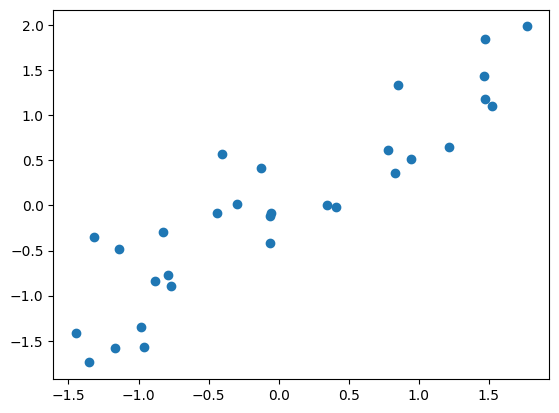

In [11]:
plt.scatter(X[:,0], X[:,1])

### Covariance Matrix

You want to reduce the number of features in the dataset while preserving most of the "information". But what does this "information" actually mean? It refers to how the features vary with respect to themselves (variance) as well as the other features (covariance). Covariance matrix of $X$ consists of the covariances associated with all possible pairs of the features in $X$. The covariance matrix of $X$ is denoted by $\mathbf{Cov}$ and computed as:

\begin{align}
\mathbf{Cov} &= X^TX\\
\mathbf{Cov} &= 
\begin{bmatrix}
\text{cov}({x_1,x_1}) & \text{cov}({x_1,x_2}) \\
\text{cov}({x_2,x_1}) & \text{cov}({x_2,x_2}) \\
\end{bmatrix}
\end{align}


Note: The diagonals $\text{cov}(x_i, x_i)$ is the variance of the feature $x_i$

In [12]:
cov = np.dot(X.T, X)
cov

array([[30.        , 27.07892187],
       [27.07892187, 30.        ]])